# Importing Libraries

In [1]:

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, mutual_info_regression

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import os

# Importing Data

In [2]:
os.chdir("F:\Python\ML-Practice\mercedes_benz_manufacturing_Linear_Reg")

In [3]:
Train=pd.read_csv('train.csv')
Train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Test=pd.read_csv('test.csv')
Test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


# Checking Data

In [5]:
Train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
Train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Treat Target Variable Outliers

<AxesSubplot:>

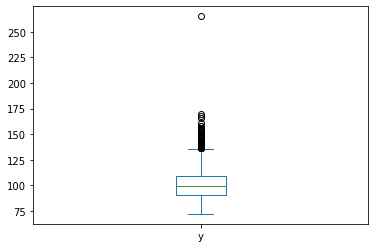

In [10]:
Train['y'].plot.box()

In [11]:
Q1 = Train['y'].quantile(0.25)
Q3 = Train['y'].quantile(0.75)

IQR = Q3 - Q1

lower_whisker= Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

print(lower_whisker)
print(upper_whisker)

63.534999999999975
136.29500000000002


In [12]:
outlier_index = Train[(Train.y > upper_whisker)].index
outlier_index

Int64Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,
             900,  995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279,
            1349, 1459, 1730, 2240, 2263, 2348, 2357, 2376, 2414, 2470, 2496,
            2735, 2736, 2852, 2887, 2888, 2905, 2983, 3028, 3090, 3133, 3177,
            3215, 3442, 3744, 3773, 3980, 4176],
           dtype='int64')

# Dropping Outliers from Train

In [13]:
Train=Train.drop(outlier_index)

In [14]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.0+ MB


# Divide into X and y

In [15]:
y = Train['y']
X = Train.drop(['y','ID'],axis=1)

X_test = Test.drop(['ID'],axis=1)

# Train & Validation Split

In [16]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state =42)

# Get Categorical and Numerical Feature Names

In [17]:
numerical_features=X.select_dtypes(include='number').columns.values
numerical_features

array(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28',
       'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37',
       'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46',
       'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55',
       'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64',
       'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74',
       'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83',
       'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92',
       'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101',
       'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117',
       'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126',
       'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134',
       'X135',

In [18]:
categorical_features=X.select_dtypes(exclude='number').columns.values
categorical_features

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

# Preprocessing

Categorical Encoding

In [19]:
Train['X0'].value_counts()

z     359
ak    342
y     323
ay    311
t     305
x     286
o     269
f     226
n     195
j     178
w     175
az    175
aj    149
s     105
ap     99
h      75
d      73
al     67
v      35
af     35
m      34
ai     33
e      32
ba     27
at     24
a      20
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
k      11
b      11
r      10
as     10
au     10
bc      6
ao      4
c       3
q       2
aa      1
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [20]:
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value= np.NaN)
oe.fit(X_train[categorical_features])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [21]:
#transform Train
X_train[categorical_features]=oe.transform(X_train[categorical_features])

#transform Val
X_val[categorical_features]=oe.transform(X_val[categorical_features])

#transform Test
X_test[categorical_features]=oe.transform(X_test[categorical_features])

# Missing Value treatment

#treat missing values after applying Ordinal encoding

In [22]:
impute = SimpleImputer(strategy = 'median')
impute.fit(X_train)

SimpleImputer(strategy='median')

In [23]:
#transform Train
X_train = impute.transform(X_train)

#transform Val
X_val=impute.transform(X_val)

#transform Test
X_test=impute.transform(X_test)

# Transformation

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
#transform Train
X_train = scaler.transform(X_train)

#transform Val
X_val = scaler.transform(X_val)

#transform Test
X_test = scaler.transform(X_test)

# Select Top Features

In [26]:
sel=SelectKBest(mutual_info_regression, k=30)
sel.fit(X_train,y_train)

SelectKBest(k=30,
            score_func=<function mutual_info_regression at 0x000001B033B091F0>)

In [27]:
#transform Train 
X_train = sel.transform(X_train)

#transform Val
X_val=sel.transform(X_val)

#transform test 
X_test = sel.transform(X_test)

# Build Model 

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

# Predict Y

In [30]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

y_test_pred = lr.predict(X_test)

# Check R Squared

In [31]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_val, y_val_pred))

0.6226177144978899
0.6268045934803195


# Submission

In [32]:
submission = pd.DataFrame({
    'ID' : Test['ID'],
    'y' : y_test_pred
})

submission.head()

,ID,y
0,1,78.767883
1,2,94.633901
2,3,72.463196
3,4,78.767883
4,5,110.123166


# Export

In [35]:
submission.to_csv('Submission_LR_F30.csv', index = False)